# **WATER QUALITY EXPLANATORY DATA ANALYSIS**
---


## **What to expect from this project?**

*   Data Wrangling and Preprocessing (Profiling, Cleaning, Reduction and Transformation)
*   Multivariate Exploratory Data Analysis
*   Geospatial (Regional) Analysis
        [Based on water quality and population; List of regional priorities on improving water potability]
*   Reccomendations for improving data collection



## **Context**

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

Drinking water and staying hydrated is associated with a reduced incidence of urinary tract infections (UTIs), lower blood pressure and heart disease. Therefore, drinking water is essential for good heart health.

Water is the most important nutrient for the body. It has many benefits for your health and helps to protect you from illness and disease. Water is also an essential part of a healthy lifestyle.

## **Table of Contents**

1.   Preparation
  11.   Subsection
  12.   Subsection
2.   Data Preprocessing
  21.   Subsection
  22.   Subsection 
3.   Regional Analysis
  31.   Subsection
  32.   Subsection
4.   Conclusion

# **Preparation**
---



### Python Libraries

In [1]:
# Installing any packages not pre-existing in this platform.

pip install geopandas
import geopandas as gpd # to create spatial data

SyntaxError: ignored

In [3]:
# This notebook was created in a Google Colab notebook running Python with a handful of pre-installed libraries

import numpy as np # linear algebra
import pandas as pd # read csv file as a dataframe and wrangle the data
import missingno as msno # identify and visualise missing data
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns # data visualisation
import plotly.express as px # data visualisation
import panel as pn

### The Dataframe

In [4]:
# Importing, reading a csv file as a Pandas DataFrame and initially assigning it to a variable called 'RawDataframe'

RawDataframe = pd.read_csv('/content/Hydrowaste.csv') 
RawDataframe # Print() is not required to generate outputs in Google Colab notebooks

,WASTE_ID,SOURCE,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LATITUDE,LONGITUDE,QUAL_LOC,LAT_OUT,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,2248,1,1279514,Strzyzow,Ukraine,UKR,50.841,24.031,2,50.840,...,1,Secondary,1,3.618801e+07,20352809,40.163,0,0,2500.0,2
1,56448,12,3598,NaN,Ukraine,UKR,44.396,33.977,1,44.390,...,4,Secondary,2,NaN,20516712,NaN,1,1,NaN,3
2,56449,12,3599,NaN,Ukraine,UKR,44.410,34.021,1,44.390,...,4,Secondary,2,NaN,20516712,NaN,1,1,NaN,3
3,56450,12,3600,NaN,Ukraine,UKR,44.440,33.724,1,44.494,...,4,Secondary,2,1.198600e+02,20514644,2.856,0,1,NaN,3
4,56452,12,3602,NaN,Ukraine,UKR,44.477,33.789,1,44.494,...,4,Secondary,2,1.019200e+02,20514644,2.856,0,1,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,56983,12,4133,NaN,Ukraine,UKR,51.464,23.973,1,51.452,...,4,Secondary,2,1.731160e+02,20336946,1.341,0,0,NaN,3
308,56987,12,4137,NaN,Ukraine,UKR,51.512,30.665,1,51.465,...,4,Secondary,2,1.627144e+04,20336870,554.698,0,1,NaN,3
309,56993,12,4143,NaN,Ukraine,UKR,51.569,32.944,1,51.594,...,4,Secondary,2,2.098007e+04,20334021,178.919,0,0,NaN,3
310,57030,12,4180,NaN,Ukraine,UKR,51.826,26.124,1,51.831,...,4,Secondary,2,3.791562e+03,20327161,53.894,0,0,NaN,3


# **Quality Check and Normalisation**
---



### Missing Values

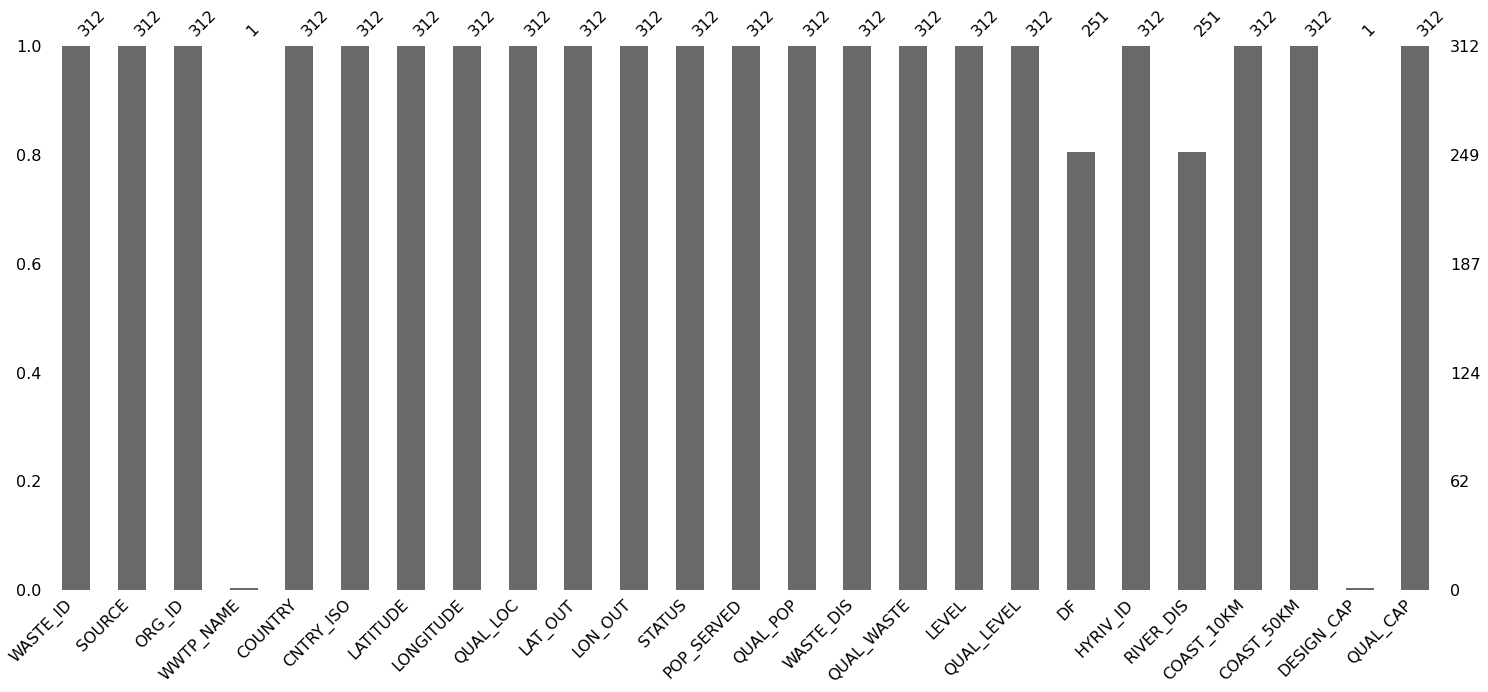

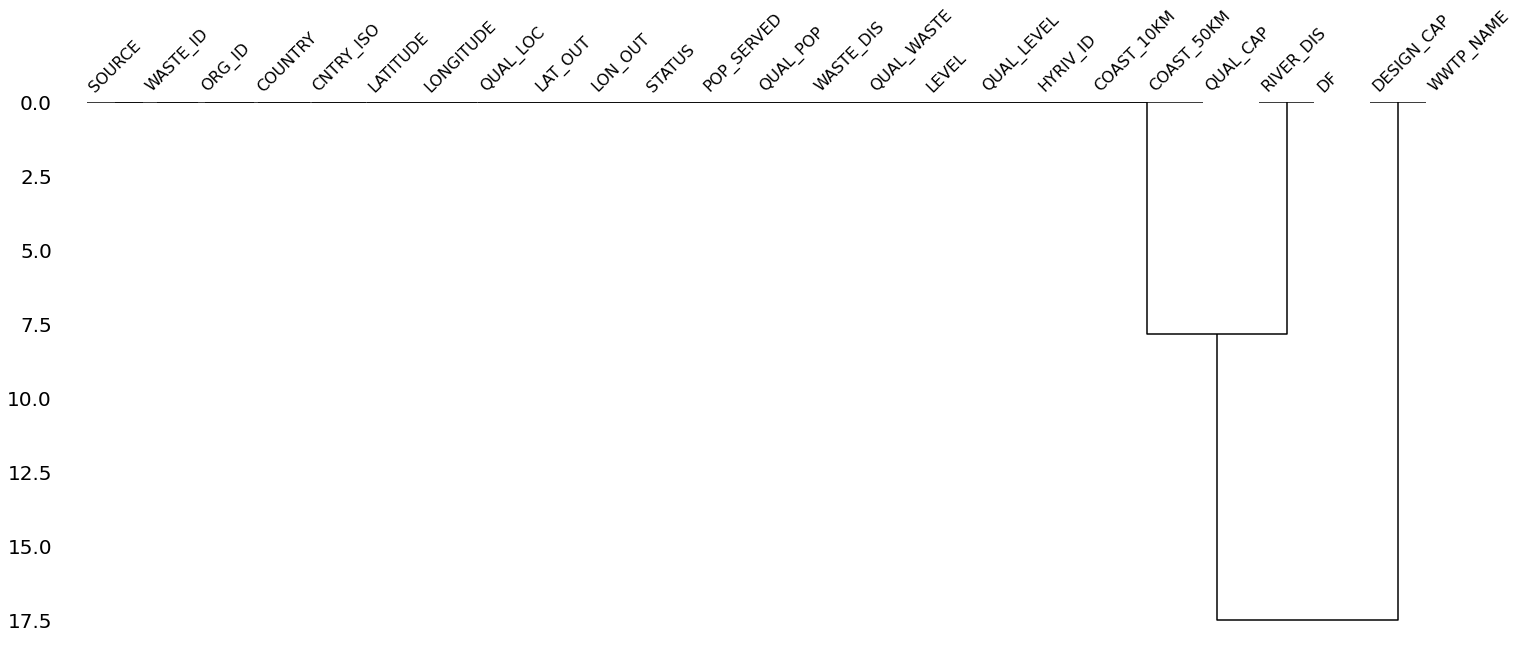

In [51]:
# First Visual: BARPLOT (Checking number of missing data)
# The height of the bar indicates how complete that column is, i.e how many non-null values are present.
msno.bar(RawDataframe)

# Second Visual: Dendrogram (grouping together columns that have strong correlations in nullity)
# The closer the columns are in the three, the more likely their null values occur in the same row (and vice-versa).
msno.dendrogram(RawDataframe)

# Collate these 2 visuals together
plt.show()

### Drop Columns and Rows

In [53]:
# COLUMNS
Dataframe = RawDataframe.drop([
    'WWTP_NAME', 'DESIGN_CAP', # Columns missing over 95% of its data
    'SOURCE', 'COUNTRY', 'CNTRY_ISO', 'STATUS', 'LEVEL', # Columns containing 1 unique value
    'QUAL_LOC', 'QUAL_POP', 'QUAL_WASTE', 'QUAL_LEVEL', 'QUAL_CAP', # Quality check columns not relevant for this analysis
    'ORG_ID', 'HYRIV_ID' # Other non-relevant columns
                                    ], axis=1)

# ROW
# I noticed that the first row [0] countained records from the WWTP Strzyzow (WASTE ID 2248)
## which is actually located in east Poland, +70km away from the Poland-Ukraine border.
Dataframe = Dataframe.drop(0)

Dataframe.head(3)

,WASTE_ID,LATITUDE,LONGITUDE,LAT_OUT,LON_OUT,POP_SERVED,WASTE_DIS,DF,RIVER_DIS,COAST_10KM,COAST_50KM
1,56448,44.396,33.977,44.390,33.96,22412,1865.016,NaN,NaN,1,1
2,56449,44.410,34.021,44.390,33.96,32052,2667.200,NaN,NaN,1,1
3,56450,44.440,33.724,44.494,33.79,24948,2076.038,119.86,2.856,0,1


### 2 Booleans for 1 Category Column

The COAST_10KM and COAST_50KM columns follow a Boolean methodology to estimate the proximity of WWTPs to their outfall areas, which can be the ocean or large lakes. In such a methodology, values of 0 represent False and values of 1 represent True for claims that a particular WWTP is within the stated distance (see the image below for better understanding). So to bring a more high-level language, the logic values of the two columns will be combined to form a categorical group of distances in string format that is very easy to understand by all types of audiences.

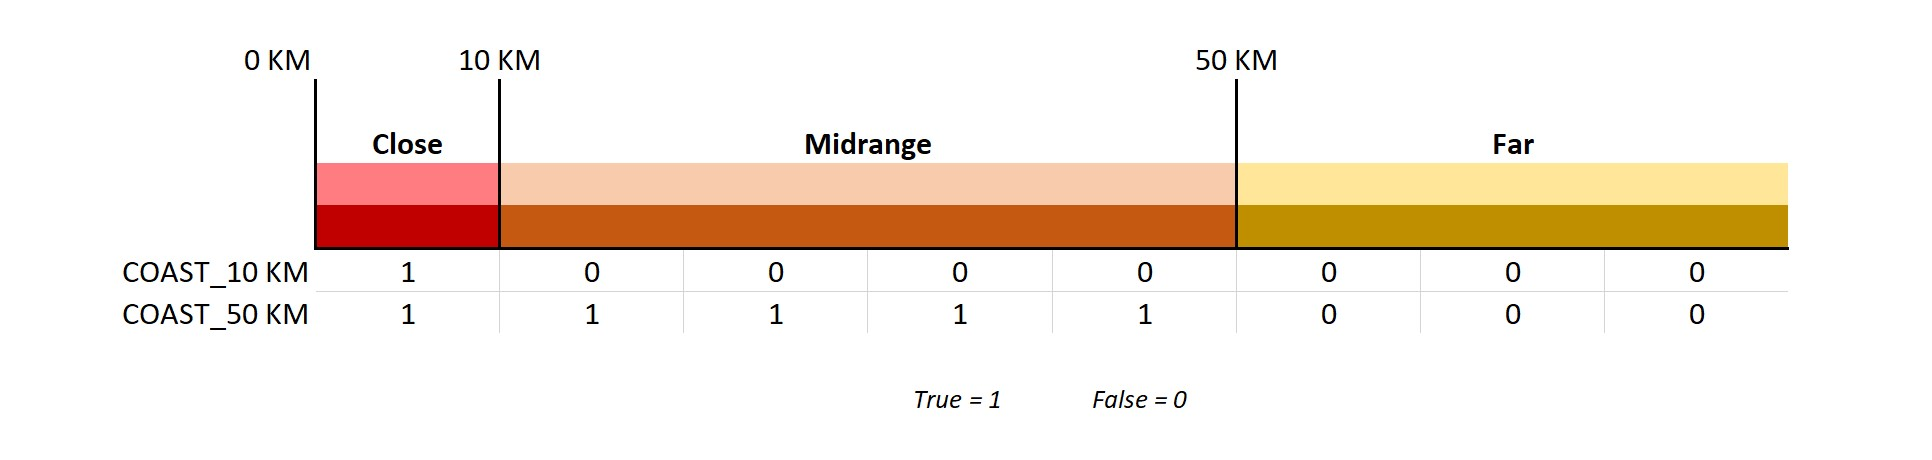

In [54]:
# Creating the conditions
conditions = [
    (Dataframe['COAST_10KM'] == 0) & (Dataframe['COAST_50KM'] == 0), # Far
    (Dataframe['COAST_10KM'] == 0) & (Dataframe['COAST_50KM'] == 1), # Midrange
    (Dataframe['COAST_10KM'] == 1) & (Dataframe['COAST_50KM'] == 1), # Close
    (Dataframe['COAST_10KM'] == 1) & (Dataframe['COAST_50KM'] == 0), # Error (if existent)
             ]

# Creating the category names
values = ['Far', 'Midrange', 'Close', 'Error']

# Assembling them into a new column
Dataframe['OUTFALL_DISTANCE'] = np.select(conditions, values)

# Deleting these two columns because they are not necessary anymore.
Dataframe = Dataframe.drop(['COAST_10KM', 'COAST_50KM'], axis=1)

### Rename Columns

In [55]:
Dataframe.rename(columns={
    'WASTE_ID': 'WWTP_ID', # ID of each wastewater treatment plant (WWTP).
    'POP_SERVED': 'POPULATION_SERVED', # Size of the population served by the WWTP.
    'DF': 'DILUTION_FACTOR', # Estimated dilution factor.
    'WASTE_DIS' : 'WASTEWATER_DISCHARGED', # Treated wastewater discharged by the WWTP in m3.
    'RIVER_DIS' : 'RIVER_DISCHARGED', # Estimated river discharge at the WWTP outfall location in m3.
    'LATITUDE': 'LATITUDE_WWTP', # Latitude of reported WWTP location.
    'LONGITUDE': 'LONGITUDE_WWTP', # Longitude of reported WWTP location.
    'LAT_OUT': 'LATITUDE_OUTFALL', # Latitude of the estimated outfall location.
    'LON_OUT': 'LONGITUDE_OUTFALL' # Longitude of the estimated outfall location.
                              }, inplace=True)

Dataframe.head(4)

,WWTP_ID,LATITUDE_WWTP,LONGITUDE_WWTP,LATITUDE_OUTFALL,LONGITUDE_OUTFALL,POPULATION_SERVED,WASTEWATER_DISCHARGED,DILUTION_FACTOR,RIVER_DISCHARGED,OUTFALL_DISTANCE
1,56448,44.396,33.977,44.390,33.96,22412,1865.016,NaN,NaN,Close
2,56449,44.410,34.021,44.390,33.96,32052,2667.200,NaN,NaN,Close
3,56450,44.440,33.724,44.494,33.79,24948,2076.038,119.86,2.856,Midrange
4,56452,44.477,33.789,44.494,33.79,29383,2445.084,101.92,2.856,Midrange


## Considerations

1.   The majority of the values recorded in the ***rawdf*** dataframe 
1 = Reported as ‘treated’ by national/regional dataset; 2 = Reported as ‘design capacity’ by national/regional dataset; 3 = Reported but type not identified; 4 = Estimated

2.   The lack of accurate categorical data on the **STATUS** **of activities of WWTPs** could increase the risk of biased analysis results, since there is no way to effectively determine which ones are *operational*, *under construction*, *temporarily deactivated*, or *decommissioned*, and thus leaving only the assumption of operability to all of them. These WWTPs might have been included in this dataset for their potential as a source of residues in river sediments from former discharges.

3.   There is no data on the **names of the WWTPs** and their **projected capacities**, which makes it more difficult to make adequate identifications as well as bivariate correlations with the size of their served populations.

4.   Factors you think are required to more accurately measure water portability

5.   The dataframe includes reports on WWTPs located in Crimea (LATITUDE_WWTP under 46 and LONGITUDE_WWTP above 32). Therefore, periodic reviews must consider current geopolitical scenarios in deciding whether to keep such records in the dataframe.



# **Exploration**
---




## Definitive Data Content

### Summary Statistics

In [56]:
Dataframe[["POPULATION_SERVED", "WASTEWATER_DISCHARGED",
               "WASTEWATER_DISCHARGED", "DILUTION_FACTOR",
               "RIVER_DISCHARGED", "OUTFALL_DISTANCE"
             ]].describe(include="all")

,POPULATION_SERVED,WASTEWATER_DISCHARGED,WASTEWATER_DISCHARGED,DILUTION_FACTOR,RIVER_DISCHARGED,OUTFALL_DISTANCE
count,311.000000,311.000000,311.000000,250.000000,250.000000,311
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Far
freq,NaN,NaN,NaN,NaN,NaN,195
mean,59168.080386,4923.705228,4923.705228,18253.682240,170.109708,NaN
std,99391.703164,8270.943694,8270.943694,86111.246797,698.366831,NaN
min,86.000000,7.143000,7.143000,2.344000,0.072000,NaN
25%,9743.500000,810.850000,810.850000,45.303500,0.972500,NaN
50%,23622.000000,1965.698000,1965.698000,182.320500,3.709000,NaN
75%,62778.000000,5224.089000,5224.089000,993.983500,29.915500,NaN


COMMENT ON RESULTS:
>*   OUTFALL_DISTANCE has only 3 unique values, thus confirming that there are no errors contained in the column.
>*   ...







### Correlation Analysis

In [ ]:
#@title Bivariate Correlation
orr=df['WASTE_DIS'].corr(df['POP_SERVED'])
corr

In [ ]:
sns.set(color_codes=True)
ax = sns.scatterplot(x="POP_SERVED", y="WASTE_DIS", data=df)
plt.show()

In [ ]:
sns.scatterplot(data=df, x="WASTE_DIS", y="POP_SERVED")

In [ ]:
dfnum = df[]
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# **Regional Analysis**
---




### Spatial Autocorrelation (First Insight)

### Second Insight

# **Conclusion**
---




1.   Idea 1
2.   Idea 2

# **NOTES**
---



### **Cool Usable Codes**



*   ***Seaborn Pair Plot with Hue*** (Multivariate Analysis; Multi plot charts)
        sns.pairplot (data = dataframe, hue = 'column1')
*   ***NumPy Filling Null Values*** (Replace missing data in the dataframe)
        df = df.fillna(0) # Or whatever the string or data type you want
        df['gdp_per_capita'] = np.where(df['column1']!=, df['gdp'] / df['population'], 0] # creating a new column by dividing gdp per population
*   List item
        Insert code


### Links To Go Back Later

*   [Distribution and characteristics of wastewater treatment plants within the global river network](https://essd.copernicus.org/articles/14/559/2022/)
*   [Using the missingno Python library to Identify and Visualise Missing Data Prior to Machine Learning](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009)
*   [Python Jupyter - Insight to Univariate and Multivariate Distribution Plots](https://www.youtube.com/watch?v=vssXHSLSGL4&ab_channel=NomanArshed)
*   [Univariate, Bivariate, and Multivariate Data Analysis in Python](https://medium.com/mlearning-ai/univariate-bivariate-and-multivariate-data-analysis-in-python-341493c3d173#:~:text=Multivariate%20analysis%20is%20a%20more,plot%2C%20with%20Hue%20as%20Approved.)
*   List item




